In [2]:
# streamlit
import rasterio
from rasterio.merge import merge
from rasterio.plot import show
import glob
import os
import numpy as np
from PIL import Image
from numpy import asarray


In [32]:
# Open the first NR file
src1 = rasterio.open('../dataset_4bands/image_5/image_5.tif')

# Open the RGB file
src3 = rasterio.open('../dataset_4bands/image_5/image_5_RGB.tif')

# Open the second chm file
src2 = rasterio.open('../dataset_4bands/image_5/chm_image_5_co.tif')

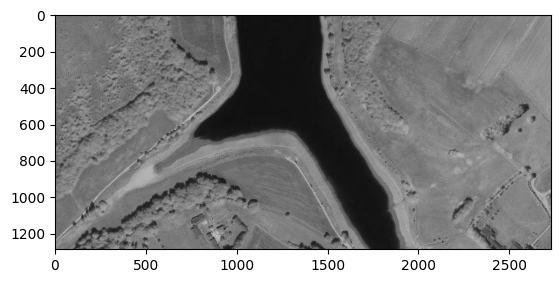

In [33]:
band = src1.read(1)
#print(band.shape)
#lum_img = numpydata[:, :, 0:1]
imgplot1 = plt.imshow(band , cmap='gray')

In [10]:
band2 = src3.read(1)
print(band.shape)

(1283, 2687)


In [11]:
band3 = src2.read(1)
print(band.shape)

(1283, 2687)


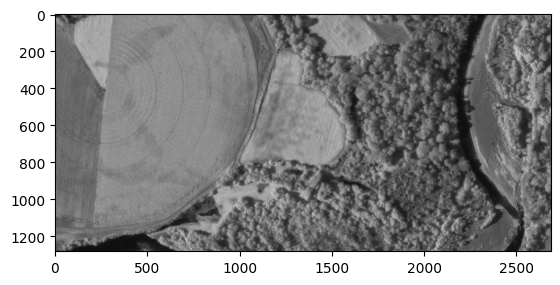

In [4]:
# afficher bande infrarouge

import matplotlib.pyplot as plt

img = Image.open('../dataset_4bands/image_1/image_1.tif')
# asarray() class is used to convert
numpydata = asarray(img)
lum_img = numpydata[:, :, 0:1]
imgplot = plt.imshow(lum_img , cmap='gray')

In [34]:

#kwargs = src2.meta
kwargs = src1.meta
kwargs['count'] = 5
kwargs.update(nodata=0)

# Read the R, G, and B bands from each file
r1, g1, b1,tr = src3.read()
ir = src1.read(1)
print(r1.shape)
chm = src2.read(1)
# round chm data and transform data to int 
chm = np.round(chm, decimals=0, out=None)
chm = chm.astype(np.uint8)
print(chm)


# Create a new image with four channels by merging the R, G, and B bands from the two files
new_image = [r1, g1, b1, ir, chm ]



#kwargs['dtype'] = 'int'
# Save the new image with four channels
with rasterio.open('../dataset_4bands/image_5/image_5_5channels.tif', 'w', **kwargs) as dst:
    dst.write(new_image[0], 1)
    dst.write(new_image[1], 2)
    dst.write(new_image[2], 3)
    dst.write(new_image[3], 4)
    dst.write(new_image[4], 5)

src1.close()
src2.close()
src3.close()

(2145, 4548)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [4]:
# metrics 
import numpy as np


#file = '../dataset_4bands/image_1/image_1_4_channels.tif'
file = '../dataset_4bands/image_6/chm_image_6_co.tif'

# Open the input raster
band1=[]
with rasterio.open(file) as input_raster:
    kwargs = input_raster.meta
    print(kwargs)

    # Read the first band
    band1 = input_raster.read(1)
    #band4 = input_raster.read(4)
    print(band1.size)

    # Calculate the statistics for the first band
    min_val = np.min(band1)
    max_val = np.max(band1)
    mean_val = np.mean(band1)
    data_type = band1.dtype

    # Print the statistics
    print(f"Minimum value: {min_val}")
    print(f"Maximum value: {max_val}")
    print(f"Mean value: {mean_val}")
    print(f"Data type: {data_type}")

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': 0.0, 'width': 2175, 'height': 4589, 'count': 1, 'crs': CRS.from_epsg(2154), 'transform': Affine(0.2999609655172406, 0.0, 66844.6136,
       0.0, -0.3000190891260531, 5458999.9228)}
9981075
Minimum value: 0.0
Maximum value: 10.008609771728516
Mean value: 0.1548899786158865
Data type: float64


In [3]:
import matplotlib.pyplot as plt

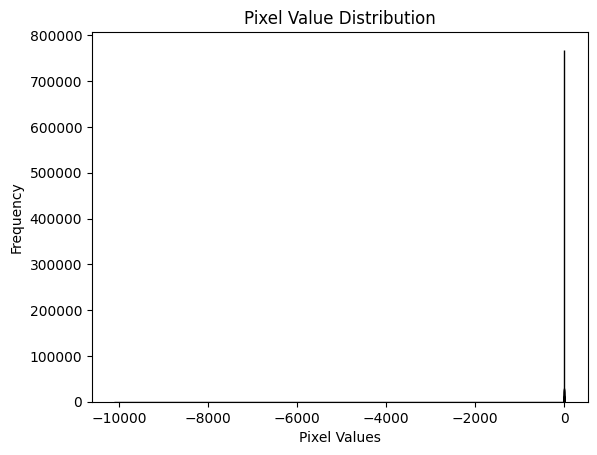

In [4]:
# Plot the histogram of pixel values
#plt.hist(band1.flatten(), bins='auto', edgecolor='black')
#plt.xlabel('Pixel Values')
#plt.ylabel('Frequency')
#plt.title('Pixel Value Distribution')

# Show the plot
#plt.show()

In [35]:
# Open the first NR file
src4 = rasterio.open('../dataset_4bands/image_5/image_5_5channels.tif')

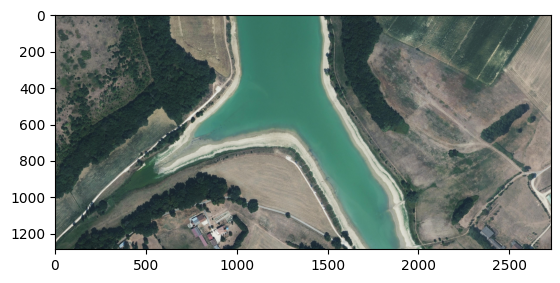

<Axes: >

In [36]:
from rasterio.plot import show

bands = src4.read()
bands.shape
lum_img4 = bands[0:3, :, :]
lum_img4.shape
#imgplot2 = plt.imshow(lum_img4)
show(lum_img4)